In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

TASK 1

petal.length    0
variety         0
dtype: int64


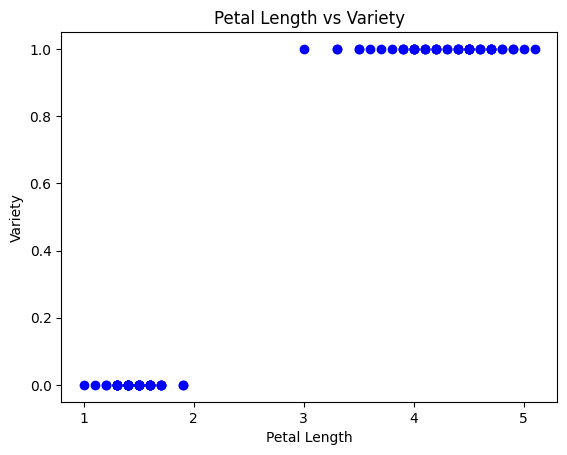

In [15]:
#data import
data = pd.read_csv('iris_binary.csv')

# Since length is enough to distinguish the variety, we truncate the data to only have length and its associated variety
data = data[['petal.length', 'variety']]

# Map 'variety' to 0 and 1
data['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1})

# Check missing values
print(data.isnull().sum())

# Visualize the data
plt.scatter(data['petal.length'], data['variety'], color='blue', marker='o')
plt.xlabel('Petal Length')
plt.ylabel('Variety')
plt.title('Petal Length vs Variety')
plt.savefig('plots/binary/petal_length_vs_variety.png')
plt.show()


In [16]:
# loss function
def loss_function(m, b, data):
    total_error = 0
    n = len(data)
    for i in range(n):
        x = data.iloc[i]['petal.length']
        y = data.iloc[i]['variety']
        total_error += (y - (m * x + b)) ** 2
    return total_error / n

# gradient descent
def gradient_descent(m_now, b_now, data, learning_rate):
    m_gradient = 0
    b_gradient = 0
    n = len(data)
    for i in range(n):
        x = data.iloc[i]['petal.length']
        y = data.iloc[i]['variety']
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m_next = m_now - learning_rate * m_gradient
    b_next = b_now - learning_rate * b_gradient
    return m_next, b_next


Epoch 0, Loss: 0.20171596311999992
Epoch 50, Loss: 0.03981410232039751
Epoch 100, Loss: 0.026558435166207997
Epoch 150, Loss: 0.02032162846260265
Epoch 200, Loss: 0.01738720370633207
Epoch 250, Loss: 0.01600655346985191
Final good parameters: m = 0.32101304842875195, b = -0.4083272435700904


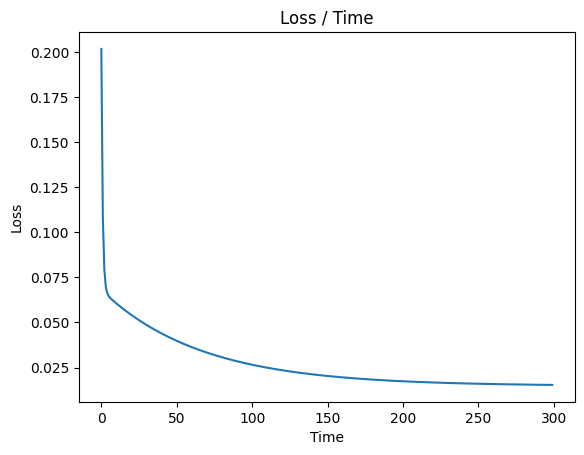

In [17]:
#start training

# Initialize parameters
m = 0
b = 0
learning_rate = 0.02
epochs = 300

loss_history = []
data = data
# Now we do gradient descent for however many epochs
for epoch in range(epochs):
    m, b = gradient_descent(m, b, data, learning_rate)
    loss = loss_function(m, b, data)
    loss_history.append(loss)
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

print(f'Final good parameters: m = {m}, b = {b}')

# Plot loss history to see how small the lost function got over time
plt.figure()
plt.plot(range(epochs), loss_history)
plt.xlabel('Time')
plt.ylabel('Loss')
plt.title('Loss / Time')
plt.savefig('plots/binary/loss_over_epochs.png')
plt.show()

In [18]:
# Make predictions
def predict(m, b, x):
    return m * x + b

data['predicted'] = data['petal.length'].apply(lambda x: predict(m, b, x))

# Apply threshold to classify
def apply_threshold(y_pred, threshold=0.5):
    return [1 if y >= threshold else 0 for y in y_pred]

data['predicted_class'] = apply_threshold(data['predicted'])

# Evaluate the model
y_true = data['variety']
y_pred = data['predicted_class']

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



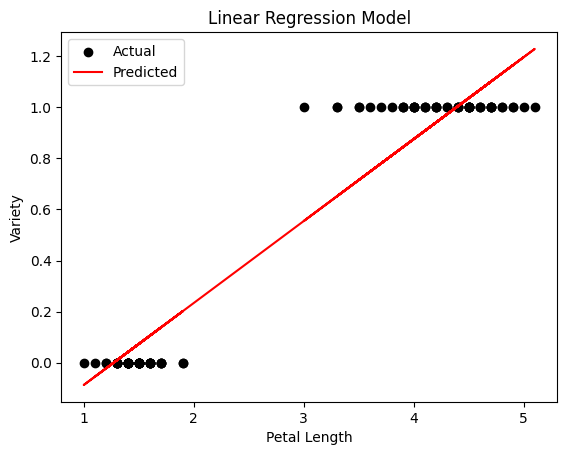

In [19]:
# Plot the results
plt.figure()
plt.scatter(data['petal.length'], data['variety'], color='black', label='Actual')
plt.plot(data['petal.length'], data['predicted'], color='red', label='Predicted')
plt.xlabel('Petal Length')
plt.ylabel('Variety')
plt.title('Linear Regression Model')
plt.legend()
plt.savefig('plots/binary/linear_regression_model.png')
# plt.show()


TASK 2

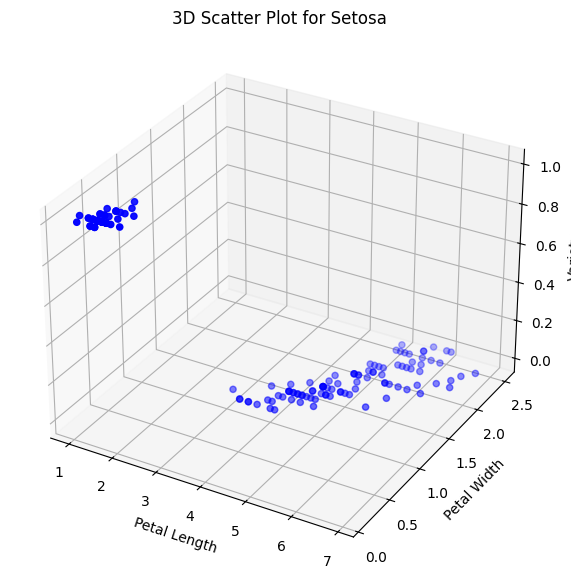

<Figure size 640x480 with 0 Axes>

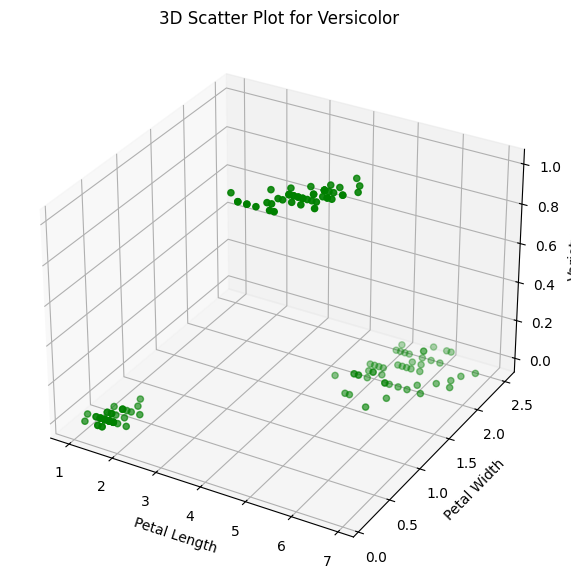

<Figure size 640x480 with 0 Axes>

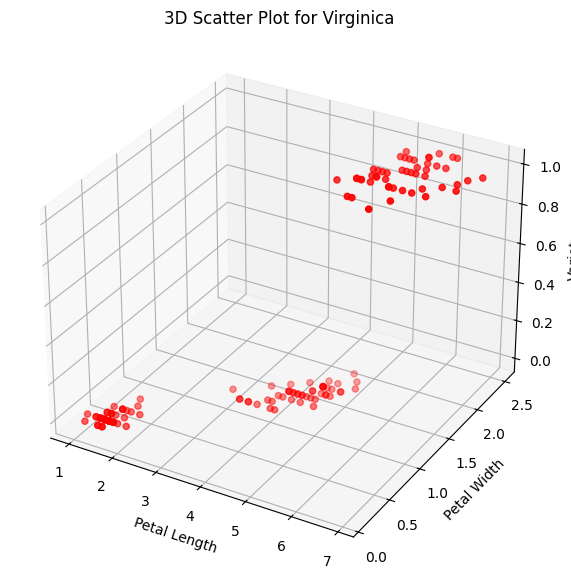

<Figure size 640x480 with 0 Axes>

In [20]:
# Data processing
data = pd.read_csv('iris.csv')
data = data[['petal.length', 'petal.width', 'variety']]

# Create separate datasets for each class (Setosa, Versicolor, Virginica)
data_Setosa = data.copy()
data_Versicolor = data.copy()
data_Virginica = data.copy()

# Map 'variety' to binary labels (1 for target class, 0 for others)
data_Setosa['variety'] = data['variety'].map({'Setosa': 1, 'Versicolor': 0, 'Virginica': 0})
data_Versicolor['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1, 'Virginica': 0})
data_Virginica['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 0, 'Virginica': 1})

# Remove rows with NaN values
data_Setosa.dropna(inplace=True)
data_Versicolor.dropna(inplace=True)
data_Virginica.dropna(inplace=True)

# Function to plot 3D scatter plot
def plot_3d_scatter(data, title, color):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['petal.length'], data['petal.width'], data['variety'], color=color, marker='o')
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    ax.set_zlabel('Variety')
    ax.set_title(title)
    plt.show()
    plt.savefig(f'plots/3d_scatter_{title.lower().replace(" ", "_")}.png')

# Visualize the data for each class
plot_3d_scatter(data_Setosa, '3D Scatter Plot for Setosa', color='blue')
plot_3d_scatter(data_Versicolor, '3D Scatter Plot for Versicolor', color='green')
plot_3d_scatter(data_Virginica, '3D Scatter Plot for Virginica', color='red')

In [21]:
data_Setosa

,petal.length,petal.width,variety
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [39]:
# a new regression model: z = -a(2.5x+y)^2 + b(2.5x+y) + c
import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Standardize the features
def standardize_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Define the linear model
def t2_model(a, b, c, X):
    return a * X[:, 0] + b * X[:, 1] + c

# Define Mean Squared Error (MSE)
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Gradient descent training function
def t2_train(X, y, learning_rate=0.005, epochs=1000):
    # Initialize parameters a, b, c randomly
    a, b, c = np.random.randn(), np.random.randn(), np.random.randn()
    m = len(X)

    for epoch in range(epochs):
        # Predicted values
        y_pred = t2_model(a, b, c, X)
        error = y_pred - y

        # Compute gradients using MSE
        grad_a = (2/m) * np.sum(error * X[:, 0])
        grad_b = (2/m) * np.sum(error * X[:, 1])
        grad_c = (2/m) * np.sum(error)

        # Update parameters
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            loss = mean_squared_error(y, y_pred)
            print(f"Epoch {epoch}, Loss: {loss:.4f}, a: {a:.4f}, b: {b:.4f}, c: {c:.4f}")
            
    return a, b, c

# Split the data into training, validation, and test sets
def split_data(data):
    X = data[['petal.length', 'petal.width']].values
    y = data['variety'].values

    # Standardize the features
    #X = standardize_data(X)

    # Stratified split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Function to train and evaluate the model
def train_and_evaluate(data):
    # Split the data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

    # Define learning rate and number of epochs
    lr = 0.005
    epochs = 300
    i = 1
    while i:
        # Train the model
        a, b, c = t2_train(X_train, y_train, lr, epochs)

        # Evaluate on validation set
        y_val_pred = t2_model(a, b, c, X_val)
        val_loss = mean_squared_error(y_val, y_val_pred)
        print(f"Validation Loss: {val_loss:.4f}")

        if val_loss >= 0.14:
            print("Not accepted model. Need to be retrained")
            continue
        
        i = 0
    # Evaluate on test set
    y_test_pred = t2_model(a, b, c, X_test)
    test_loss = mean_squared_error(y_test, y_test_pred)
    print(f"Test Loss: {test_loss:.4f}")

    return a, b, c

# Plot the decision surface
def plot_decision_surface(a, b, c, data, title='Decision Surface with Data Points', Name='Setosa'):
    X = standardize_data(data[['petal.length', 'petal.width']].values)
    y = data['variety'].values

    x_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x_mesh, y_mesh = np.meshgrid(x_range, y_range)

    XY_range = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T
    z_mesh = t2_model(a, b, c, XY_range).reshape(x_mesh.shape)

    fig = go.Figure()
    fig.add_trace(go.Surface(x=x_mesh, y=y_mesh, z=z_mesh, opacity=0.7, colorscale='YlGnBu'))
    fig.add_trace(go.Scatter3d(x=X[:, 1], y=X[:, 0], z=y, mode='markers', marker=dict(color='red', size=5)))

    fig.update_layout(title=title + " for " + Name,
                      scene=dict(xaxis_title='Petal Width', yaxis_title='Petal Length', zaxis_title='Variety'),
                      margin=dict(l=0, r=0, b=0, t=40))
    fig.show()


In [ ]:
# Train and evaluate the model for Setosa
print("Training Setosa Model")
a_setosa, b_setosa, c_setosa = train_and_evaluate(data_Setosa)

## Train and evaluate the model for Versicolor
#print("\nTraining Versicolor Model")
#a_versicolor, b_versicolor, c_versicolor = train_and_evaluate(data_Versicolor)

# Train and evaluate the model for Virginica
print("\nTraining Virginica Model")
a_virginica, b_virginica, c_virginica = train_and_evaluate(data_Virginica)
plot_decision_surface(a_setosa, b_setosa, c_setosa, data_Setosa)
#plot_decision_surface(a_versicolor, b_versicolor, c_versicolor, data_Versicolor)
plot_decision_surface(a_virginica, b_virginica, c_virginica, data_Virginica,title='Decision Surface with Data Points', Name='Virginica')

Training Setosa Model
Epoch 0, Loss: 16.1514, a: 0.3915, b: 0.1059, c: 1.8153
Epoch 100, Loss: 0.0501, a: -0.2999, b: -0.0908, c: 1.5958
Epoch 200, Loss: 0.0435, a: -0.2971, b: -0.0644, c: 1.5450
Validation Loss: 0.0481
Test Loss: 0.0672

Training Virginica Model
Epoch 0, Loss: 57.7890, a: -1.3170, b: -0.2154, c: -0.0888
Epoch 100, Loss: 0.1084, a: -0.0027, b: 0.2770, c: 0.1101
Epoch 200, Loss: 0.0955, a: -0.0010, b: 0.3169, c: 0.0410
Validation Loss: 0.1419
Not accepted model. Need to be retrained
Epoch 0, Loss: 12.6688, a: -0.4344, b: -0.7803, c: 0.5048
Epoch 100, Loss: 0.3080, a: 0.1756, b: -0.4455, c: 0.4079
Epoch 200, Loss: 0.2223, a: 0.1788, b: -0.3397, c: 0.2311
Validation Loss: 0.2245
Not accepted model. Need to be retrained
Epoch 0, Loss: 39.0712, a: 1.6868, b: -0.0933, c: -1.3233
Epoch 100, Loss: 0.2740, a: 0.5832, b: -0.4977, c: -1.3637
Epoch 200, Loss: 0.2224, a: 0.5571, b: -0.5222, c: -1.2079
Validation Loss: 0.1955
Not accepted model. Need to be retrained
Epoch 0, Loss: 1

In [ ]:
# Vectorized classification function for the iris dataset
def iris_classification(X, a_setosa, b_setosa, c_setosa, a_virginica, b_virginica, c_virginica):
    # 计算 setosa 和 virginica 的模型预测值
    y_setosa = X[:, 0] * a_setosa + X[:, 1] * b_setosa + c_setosa
    y_virginica = X[:, 0] * a_virginica + X[:, 1] * b_virginica + c_virginica
    y_setosa = standardize_data(y_setosa.reshape(-1,1))
    y_virginica = standardize_data(y_virginica.reshape(-1,1))
    # 初始化预测标签数组
    y_predict = np.empty(len(X), dtype=object)

    # 遍历每个样本并根据规则进行分类
    for i in range(len(X)):
        y_predict[i] = 'Versicolor'
        if y_setosa[i] > y_virginica[i] and y_setosa[i] > 0.75:
            y_predict[i] = 'Setosa'
        if y_virginica[i] > y_setosa[i] and y_virginica[i] > 0.75:
            y_predict[i] = 'Virginica'

    return y_predict, y_setosa, y_virginica
# Function to evaluate the classification results
def evaluate_classification(y_predict, y_true):
    # Calculate the number of misclassifications
    error_count = np.sum(y_predict != y_true)
    # Calculate the accuracy of the classification
    accuracy = (len(y_true) - error_count) / len(y_true)

    # Print the results
    print(f"Total samples: {len(y_true)}")
    print(f"Number of misclassifications: {error_count}")
    print(f"Accuracy: {accuracy:.2%}")

    return error_count, accuracy

# Function to plot the classification results
def plot_classification_results(y_predict, y_true):
    # Convert class labels to numerical codes for visualization
    labels = ['Setosa', 'Versicolor', 'Virginica']
    y_predict_num = np.array([labels.index(label) for label in y_predict])
    y_true_num = np.array([labels.index(label) for label in y_true])

    # Create a scatter plot comparing predictions with true labels
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true_num, color='green', label='True Labels', alpha=0.6)
    plt.scatter(range(len(y_predict)), y_predict_num, color='blue', marker='x', label='Predicted Labels', alpha=0.6)

    # Add legend, title, and axis labels
    plt.title("Comparison of True and Predicted Labels")
    plt.xlabel("Sample Index")
    plt.ylabel("Class Labels (0=Setosa, 1=Versicolor, 2=Virginica)")
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
#y_true

Total samples: 150
Number of misclassifications: 6
Accuracy: 96.00%


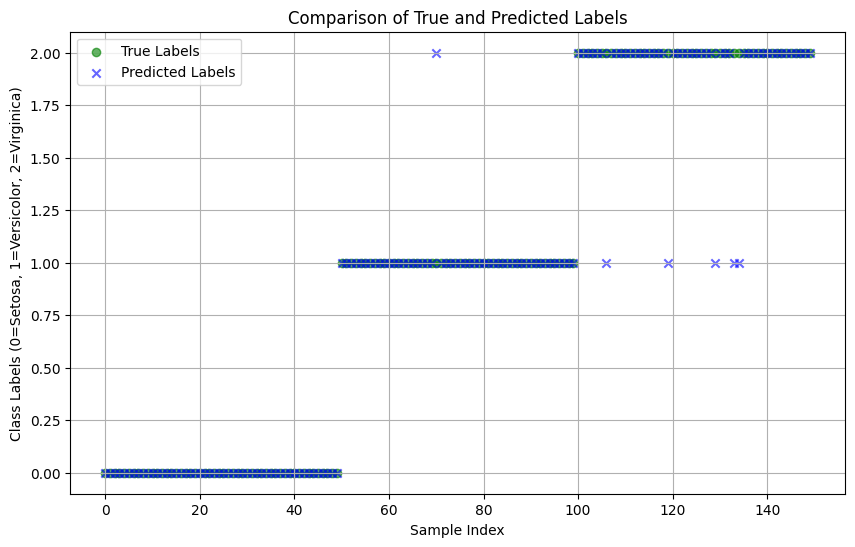

In [41]:
x_true = data[['petal.length', 'petal.width']].values
y_true = data['variety'].values
y_predict, y_predict_setosa, y_predict_virginica = iris_classification(x_true, a_setosa, b_setosa, c_setosa, a_virginica, b_virginica, c_virginica)

# 计算错误分类数量并可视化
error_count, accuracy = evaluate_classification(y_predict, y_true)
plot_classification_results(y_predict, y_true)

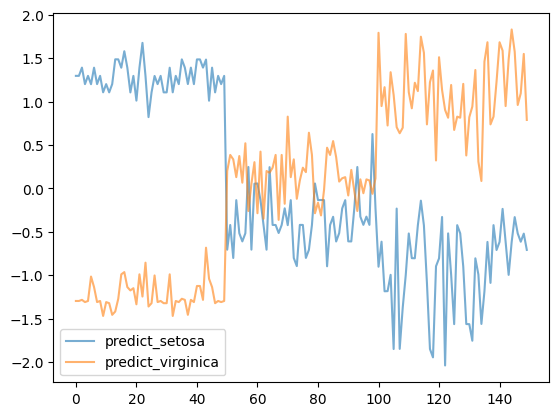

In [29]:
y_predict_setosa = standardize_data(y_predict_setosa.reshape(-1,1))
y_predict_virginica = standardize_data(y_predict_virginica.reshape(-1,1))
plt.plot(range(len(y_predict_setosa)),y_predict_setosa,label='predict_setosa', alpha=0.6)   
plt.plot(range(len(y_predict_virginica)),y_predict_virginica,label='predict_virginica', alpha=0.6) 
plt.legend()

In [ ]:
"""import numpy as np
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Standardize the features
def standardize_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Define the linear model
def t2_model(a, b, c, X):
    output = a * (2.5*X[:, 1]+X[:, 0])**2 + b * (2.5*X[:, 1]+X[:,0]) + c
    return output.clip

# Define Mean Squared Error (MSE)
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# Gradient descent training function
def t2_train(X, y, learning_rate=0.005, epochs=1000):
    # Initialize parameters a, b, c randomly
    a, b, c = np.random.randn(), np.random.randn(), np.random.randn()
    m = len(X)

    for epoch in range(epochs):
        # Predicted values
        y_pred = t2_model(a, b, c, X)
        error = y_pred - y

        # Compute gradients using MSE
        grad_a = (2/m) * np.sum(error * (2.5*X[:, 1]+X[:, 1])**2)
        grad_b = (2/m) * np.sum(error * (2.5*X[:, 1]+X[:, 1]))
        grad_c = (2/m) * np.sum(error)

        # Update parameters
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

        # Print loss every 100 epochs
        if epoch % 100 == 0:
            loss = mean_squared_error(y, y_pred)
            print(f"Epoch {epoch}, Loss: {loss:.4f}, a: {a:.4f}, b: {b:.4f}, c: {c:.4f}")
            
    return a, b, c

# Split the data into training, validation, and test sets
def split_data(data):
    X = data[['petal.length', 'petal.width']].values
    y = data['variety'].values

    # Standardize the features
    X = standardize_data(X)

    # Stratified split
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Function to train and evaluate the model
def train_and_evaluate(data):
    # Split the data
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

    # Define learning rate and number of epochs
    lr = 0.005
    epochs = 1000

    # Train the model
    a, b, c = t2_train(X_train, y_train, lr, epochs)

    # Evaluate on validation set
    y_val_pred = t2_model(a, b, c, X_val)
    val_loss = mean_squared_error(y_val, y_val_pred)
    print(f"Validation Loss: {val_loss:.4f}")

    if val_loss >= 0.2:
        print("lr or epoch need to be adjest")
        return 0
    # Evaluate on test set
    y_test_pred = t2_model(a, b, c, X_test)
    test_loss = mean_squared_error(y_test, y_test_pred)
    print(f"Test Loss: {test_loss:.4f}")

    return a, b, c

# Plot the decision surface
def plot_decision_surface(a, b, c, data, title='Decision Surface with Data Points', Name='Setosa'):
    X = standardize_data(data[['petal.length', 'petal.width']].values)
    y = data['variety'].values

    x_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    y_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x_mesh, y_mesh = np.meshgrid(x_range, y_range)

    XY_range = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T
    z_mesh = t2_model(a, b, c, XY_range).reshape(x_mesh.shape)

    fig = go.Figure()
    fig.add_trace(go.Surface(x=x_mesh, y=y_mesh, z=z_mesh, opacity=0.7, colorscale='YlGnBu'))
    fig.add_trace(go.Scatter3d(x=X[:, 1], y=X[:, 0], z=y, mode='markers', marker=dict(color='red', size=5)))

    fig.update_layout(title=title + " for " + Name,
                      scene=dict(xaxis_title='Petal Width', yaxis_title='Petal Length', zaxis_title='Variety'),
                      margin=dict(l=0, r=0, b=0, t=40))
    fig.show()
"""

'import numpy as np\nimport plotly.graph_objects as go\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n# Standardize the features\ndef standardize_data(X):\n    scaler = StandardScaler()\n    X_scaled = scaler.fit_transform(X)\n    return X_scaled\n\n# Define the linear model\ndef t2_model(a, b, c, X):\n    output = a * (2.5*X[:, 1]+X[:, 0])**2 + b * (2.5*X[:, 1]+X[:,0]) + c\n    return output.clip\n\n# Define Mean Squared Error (MSE)\ndef mean_squared_error(y, y_pred):\n    return np.mean((y - y_pred) ** 2)\n\n# Gradient descent training function\ndef t2_train(X, y, learning_rate=0.005, epochs=1000):\n    # Initialize parameters a, b, c randomly\n    a, b, c = np.random.randn(), np.random.randn(), np.random.randn()\n    m = len(X)\n\n    for epoch in range(epochs):\n        # Predicted values\n        y_pred = t2_model(a, b, c, X)\n        error = y_pred - y\n\n        # Compute gradients using MSE\n        grad_a = (2/m) * np.s

In [ ]:
"""# Data and model parameters
a, b, c, data = a_setosa, b_setosa, c_setosa, data_Setosa
title = 'Decision Surface with Data Points'
Name = 'Setosa'
X = data[['petal.length', 'petal.width']].values
y = data['variety'].values

# Create the grid for mesh
x_range = np.linspace(X[:, 1].min()-2, X[:, 1].max()+2, 100)
y_range = np.linspace(X[:, 0].min()-2, X[:, 0].max()+2, 100)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Reshape to create XY_range for decision surface
XY_range = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T

# Calculate z values (decision surface)
z_mesh = t2_model(a, b, c, XY_range)

# Reshape z_mesh to match meshgrid shape
z_mesh = z_mesh.reshape(x_mesh.shape)

# Create Plotly figure
fig = go.Figure()

# Add decision surface
fig.add_trace(go.Surface(
    x=x_mesh,
    y=y_mesh,
    z=z_mesh,
    opacity=0.7,
    colorscale='YlGnBu',
    name='Decision Surface'
))

# Optionally add data points as a scatter plot
fig.add_trace(go.Scatter3d(
    x=X[:, 1],
    y=X[:, 0],
    z=y,
    mode='markers',
    marker=dict(color='red', size=5),
    name='Data Points'
))

# Set up layout
fig.update_layout(
    title=title +" from " +Name,
    scene=dict(
        xaxis_title='Petal Width',
        yaxis_title='Petal Length',
        zaxis_title='Variety'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the figure
fig.show()"""

'# Data and model parameters\na, b, c, data = a_setosa, b_setosa, c_setosa, data_Setosa\ntitle = \'Decision Surface with Data Points\'\nName = \'Setosa\'\nX = data[[\'petal.length\', \'petal.width\']].values\ny = data[\'variety\'].values\n\n# Create the grid for mesh\nx_range = np.linspace(X[:, 1].min()-2, X[:, 1].max()+2, 100)\ny_range = np.linspace(X[:, 0].min()-2, X[:, 0].max()+2, 100)\nx_mesh, y_mesh = np.meshgrid(x_range, y_range)\n\n# Reshape to create XY_range for decision surface\nXY_range = np.vstack([x_mesh.ravel(), y_mesh.ravel()]).T\n\n# Calculate z values (decision surface)\nz_mesh = t2_model(a, b, c, XY_range)\n\n# Reshape z_mesh to match meshgrid shape\nz_mesh = z_mesh.reshape(x_mesh.shape)\n\n# Create Plotly figure\nfig = go.Figure()\n\n# Add decision surface\nfig.add_trace(go.Surface(\n    x=x_mesh,\n    y=y_mesh,\n    z=z_mesh,\n    opacity=0.7,\n    colorscale=\'YlGnBu\',\n    name=\'Decision Surface\'\n))\n\n# Optionally add data points as a scatter plot\nfig.add_tr

In [ ]:
x_mesh,y_mesh,z_mesh

NameError: name 'x_mesh' is not defined

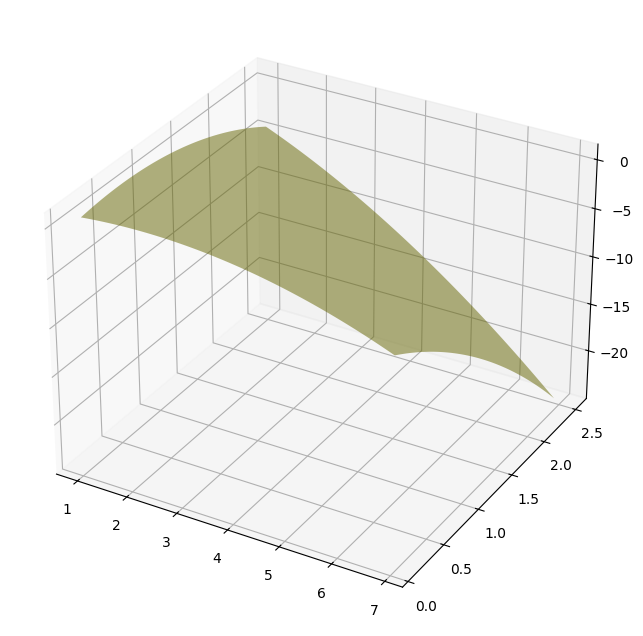

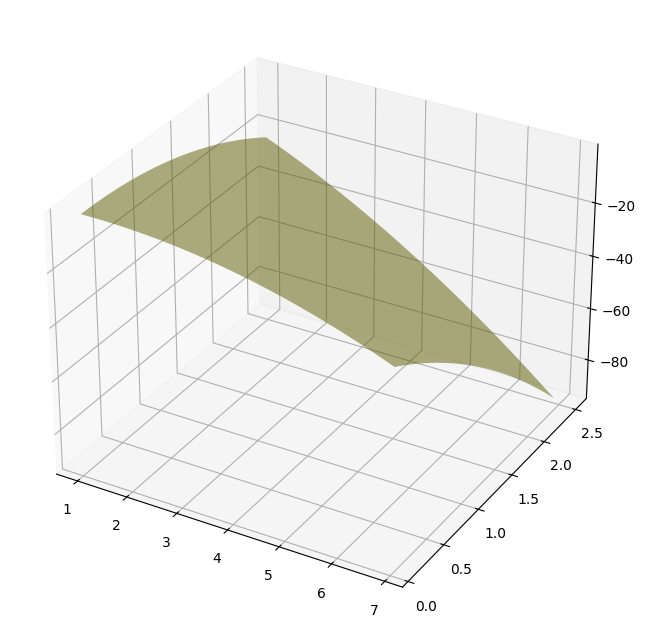

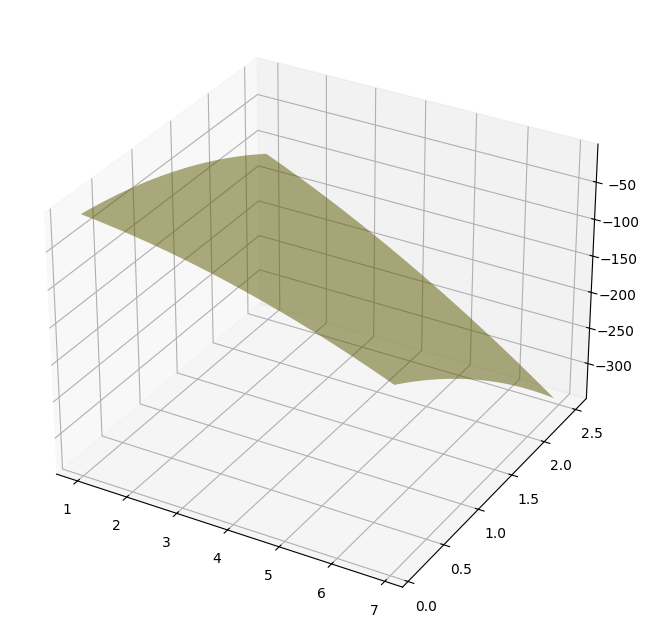

In [ ]:
X = data_Setosa[['petal.length', 'petal.width']].values
y = data_Setosa['variety'].values
plot_decision_surface(a_setosa, b_setosa, c_setosa,X,y,title='Decision Surface with Data Points')
X = data_Versicolor[['petal.length', 'petal.width']].values
y = data_Versicolor['variety'].values
plot_decision_surface(a_versicolor, b_versicolor, c_versicolor,X,y,title='Decision Surface with Data Points')
X = data_Virginica[['petal.length', 'petal.width']].values
y = data_Virginica['variety'].values
plot_decision_surface(a_virginica, b_virginica, c_virginica,X,y,title='Decision Surface with Data Points')

In [ ]:
def binary_classifier_plots(file='iris_binary.csv'):
    data = pd.read_csv(file, sep=',')
    print(data.head())  # Display first few rows
    # Check for missing values
    # print(data.isnull().sum())
    # Plotting pairwise relationships
    sns.pairplot(data, hue='variety', markers=["o", "s"])
    plt.savefig('plots/binary/pairplot.png')  # Save the plot

def load_data(file='iris_binary.csv'):
    # Load the data
    data = pd.read_csv(file)
    # Display the first few rows
    print(data.head())
    # Map the 'variety' column to binary labels
    data['variety'] = data['variety'].map({'Setosa': 0, 'Versicolor': 1})
    # Check for missing values
    print(data.isnull().sum())
    return data

def split_features_target(data):
    # Features - all columns except 'variety'
    X = data.drop('variety', axis=1)
    # Target variable
    y = data['variety']
    return X, y

def split_train_test(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    # Add a column of ones to include the bias (intercept) term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    # Initialize weights randomly
    theta = np.random.randn(X_b.shape[1], 1)
    m = len(X_b)
    for epoch in range(epochs):
        gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y.values.reshape(-1,1))
        theta = theta - learning_rate * gradients
        #  print cost every 100 epochs, we see it going down
        if epoch % 100 == 0:
            cost = (1/m) * np.sum((X_b.dot(theta) - y.values.reshape(-1,1)) ** 2)
            print(f"Epoch {epoch}, Cost: {cost}")
    return theta

def predict_manual(X, theta):
    # Add bias term
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    y_pred_continuous = X_b.dot(theta)
    return y_pred_continuous

def apply_threshold(y_pred_continuous, threshold=0.5):
    y_pred_class = (y_pred_continuous >= threshold).astype(int)
    return y_pred_class

def evaluate_model(y_test, y_pred_class):
    accuracy = accuracy_score(y_test, y_pred_class)
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    class_report = classification_report(y_test, y_pred_class)
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

def main():
    # Optional: Generate plots
    binary_classifier_plots()

    # Step 1: Load and preprocess the data
    data = load_data()

    # Step 2: Split features and target
    X, y = split_features_target(data)

    # Step 3: Split into training and testing sets
    X_train, X_test, y_train, y_test = split_train_test(X, y)

    # Step 4: Train the model using gradient descent
    theta = gradient_descent(X_train, y_train)

    # Step 5: Make predictions on the test set
    y_pred_continuous = predict_manual(X_test, theta)

    # Step 6: Apply the decision threshold to get back the class labels
    y_pred_class = apply_threshold(y_pred_continuous)

    # Step 7: Evaluate the model
    evaluate_model(y_test, y_pred_class)


   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
Epoch 0, Cost: 0.3684661844652247
Epoch 100, Cost: 0.056049093233037584
Epoch 200, Cost: 0.04946934809590781
Epoch 300, Cost: 0.0

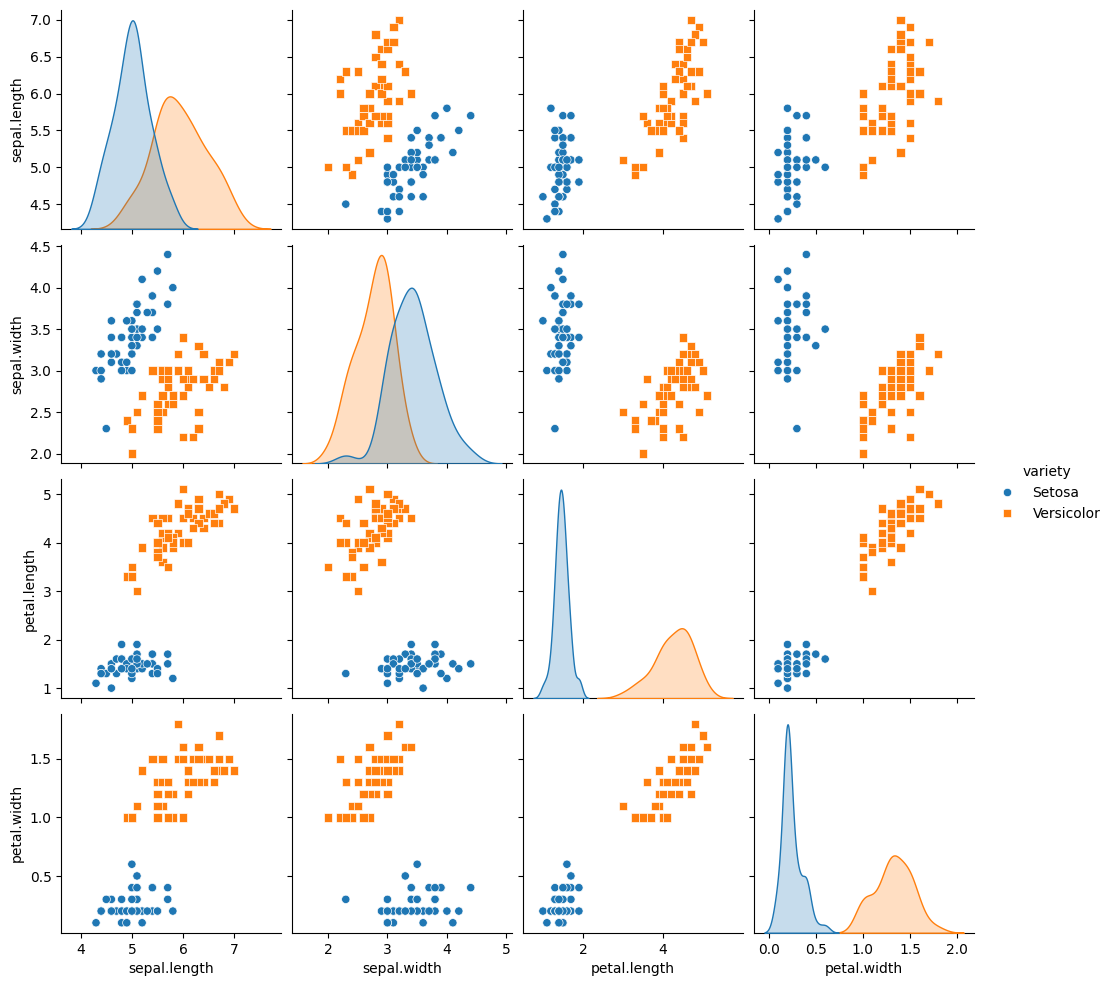

In [ ]:
if __name__ == "__main__":
    main()

In [ ]:
# Step 1: Load and preprocess the data
data = load_data()

# Step 2: Split features and target
X, y = split_features_target(data)

# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = split_train_test(X, y)

# Step 4: Train the model using gradient descent
theta = gradient_descent(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_continuous = predict_manual(X_test, theta)

# Step 6: Apply the decision threshold to get back the class labels
y_pred_class = apply_threshold(y_pred_continuous)

# Step 7: Evaluate the model
evaluate_model(y_test, y_pred_class)

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64
Epoch 0, Cost: 0.02498241530056626
Epoch 100, Cost: 0.02126486547001448
Epoch 200, Cost: 0.020450898182530652
Epoch 300, Cost: 0.019759100366541063
Epoch 400, Cost: 0.01916486282016512
Epoch 500, Cost: 0.018649936530204466
Epoch 600, Cost: 0.01819963583924137
Epoch 700, Cost: 0.017802137981745913
Epoch 800, Cost: 0.017447921280311286
Epoch 900, Cost: 0.017129313682197302
Accuracy: 1.0
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

          

In [ ]:
theta

array([[ 1.41789527],
       [-0.1042009 ],
       [-0.32300026],
       [ 0.02894896],
       [ 0.73655898]])

theta

In [ ]:
#try to visualise the regression plane
import plotly.graph_objects as go
import numpy as np

def plot_decision_boundary_3d(X, y, theta, feature_indices, feature_names, title):
    """
    绘制 3D 交互式决策边界图
    X: 输入的特征矩阵
    y: 目标标签
    theta: 模型的权重参数 (5 个参数)
    feature_indices: 使用的两个特征的索引 (如 [0, 1] 或 [2, 3])
    feature_names: 特征名称列表
    title: 图像的标题
    """
    # 将 X 转为 NumPy 数组
    X_np = X.values if hasattr(X, 'values') else X
    y_np = y.values if hasattr(y, 'values') else y

    # 选择用于可视化的两个特征
    X_selected = X_np[:, feature_indices]

    # 创建网格用于绘制决策边界
    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # 根据选择的特征索引，获取对应的权重
    if feature_indices == [0, 1]:
        w1, w2, b = theta[1], theta[2], theta[0]
    else:
        w1, w2, b = theta[3], theta[4], theta[0]

    # 计算网格上的预测值
    Z = w1 * xx + w2 * yy + b

    # 创建 3D 散点图
    fig = go.Figure()

    # 绘制训练数据的 3D 散点图
    fig.add_trace(go.Scatter3d(
        x=X_selected[:, 0],
        y=X_selected[:, 1],
        z=y_np,
        mode='markers',
        marker=dict(size=5, color=y_np, colorscale='Viridis', opacity=0.8),
        name='Training Data'
    ))

    # 绘制决策平面
    fig.add_trace(go.Surface(
        x=xx,
        y=yy,
        z=Z,
        opacity=0.5,
        colorscale='reds',
        name='Decision Boundary'
    ))

    # 设置图像布局
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title=feature_names[0],
            yaxis_title=feature_names[1],
            zaxis_title='Target Value (y)',
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )

    # 显示图像
    fig.show()

# 调用 3D 可视化函数，分别绘制两张图
plot_decision_boundary_3d(X_train, y_train, theta, [0, 1], ['Sepal Length', 'Sepal Width'], 'Decision Boundary for Sepal Features')
plot_decision_boundary_3d(X_train, y_train, theta, [2, 3], ['Petal Length', 'Petal Width'], 'Decision Boundary for Petal Features')


In [ ]:
X,y

(    sepal.length  sepal.width  petal.length  petal.width
 0            5.1          3.5           1.4          0.2
 1            4.9          3.0           1.4          0.2
 2            4.7          3.2           1.3          0.2
 3            4.6          3.1           1.5          0.2
 4            5.0          3.6           1.4          0.2
 ..           ...          ...           ...          ...
 95           5.7          3.0           4.2          1.2
 96           5.7          2.9           4.2          1.3
 97           6.2          2.9           4.3          1.3
 98           5.1          2.5           3.0          1.1
 99           5.7          2.8           4.1          1.3
 
 [100 rows x 4 columns],
 0     0
 1     0
 2     0
 3     0
 4     0
      ..
 95    1
 96    1
 97    1
 98    1
 99    1
 Name: variety, Length: 100, dtype: int64)